# Preprocessing

In [ ]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score, precision_score, recall_score

In [ ]:
df = pd.read_csv("https://media.githubusercontent.com/media/nhanna1219/Global-Terrorism-OLAP/main/Terrorism.csv", encoding='latin1')
df

,FactID,dYear,dMonth,dDay,dDate,CountryID,CountryName,RegionID,RegionName,City,...,TargetTypeID,TargetType,WeaponTypeID,WeaponType,Kills,Wounds,Success,Suicide,PropertyDamage,GName
0,197000000001,1970,7,2,02/07/1970,58,Dominican Republic,2,Central America & Caribbean,Santo Domingo,...,14,Private Citizens & Property,13,Unknown,1.0,0.0,1,0,0,MANO-D
1,197000000002,1970,1,1,01/01/1970,130,Mexico,1,North America,Mexico city,...,7,Government (Diplomatic),13,Unknown,0.0,0.0,1,0,0,23rd of September Communist League
2,197001000001,1970,1,1,01/01/1970,160,Philippines,5,Southeast Asia,Unknown,...,10,Journalists & Media,13,Unknown,1.0,0.0,1,0,0,Unknown
3,197001000002,1970,1,1,01/01/1970,78,Greece,8,Western Europe,Athens,...,7,Government (Diplomatic),6,Explosives,-1.0,-1.0,1,0,1,Unknown
4,197001000003,1970,1,1,01/01/1970,101,Japan,4,East Asia,Fukouka,...,7,Government (Diplomatic),8,Incendiary,-1.0,-1.0,1,0,1,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,31/12/2017,182,Somalia,11,Sub-Saharan Africa,Ceelka Geelow,...,4,Military,5,Firearms,1.0,2.0,1,0,-9,Al-Shabaab
181687,201712310029,2017,12,31,31/12/2017,200,Syria,10,Middle East & North Africa,Jableh,...,4,Military,6,Explosives,2.0,7.0,1,0,1,Muslim extremists
181688,201712310030,2017,12,31,31/12/2017,160,Philippines,5,Southeast Asia,Kubentog,...,14,Private Citizens & Property,8,Incendiary,0.0,0.0,1,0,1,Bangsamoro Islamic Freedom Movement (BIFM)
181689,201712310031,2017,12,31,31/12/2017,92,India,6,South Asia,Imphal,...,2,Government (General),6,Explosives,0.0,0.0,0,0,-9,Unknown


In [ ]:
df.dtypes

FactID              int64
dYear               int64
dMonth              int64
dDay                int64
dDate              object
CountryID           int64
CountryName        object
RegionID            int64
RegionName         object
City               object
Latitude          float64
Longitude         float64
ProvState          object
AttackTypeID        int64
AttackType         object
TargetTypeID        int64
TargetType         object
WeaponTypeID        int64
WeaponType         object
Kills             float64
Wounds            float64
Success             int64
Suicide             int64
PropertyDamage      int64
GName              object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 25 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   FactID          181691 non-null  int64  
 1   dYear           181691 non-null  int64  
 2   dMonth          181691 non-null  int64  
 3   dDay            181691 non-null  int64  
 4   dDate           181691 non-null  object 
 5   CountryID       181691 non-null  int64  
 6   CountryName     181691 non-null  object 
 7   RegionID        181691 non-null  int64  
 8   RegionName      181691 non-null  object 
 9   City            181256 non-null  object 
 10  Latitude        181691 non-null  float64
 11  Longitude       181691 non-null  float64
 12  ProvState       181270 non-null  object 
 13  AttackTypeID    181691 non-null  int64  
 14  AttackType      181691 non-null  object 
 15  TargetTypeID    181691 non-null  int64  
 16  TargetType      181691 non-null  object 
 17  WeaponType

In [ ]:
# Information description of the numeric data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
FactID,181691.0,2.002705e+11,1.325957e+09,1.970000e+11,1.991021e+11,2.009022e+11,2.014081e+11,2.017123e+11
dYear,181691.0,2.002639e+03,1.325943e+01,1.970000e+03,1.991000e+03,2.009000e+03,2.014000e+03,2.017000e+03
dMonth,181691.0,6.467387e+00,3.388110e+00,1.000000e+00,4.000000e+00,6.000000e+00,9.000000e+00,1.200000e+01
dDay,181691.0,1.551055e+01,8.805691e+00,1.000000e+00,8.000000e+00,1.500000e+01,2.300000e+01,3.100000e+01
CountryID,181691.0,1.319685e+02,1.124145e+02,4.000000e+00,7.800000e+01,9.800000e+01,1.600000e+02,1.004000e+03
RegionID,181691.0,7.160938e+00,2.933408e+00,1.000000e+00,5.000000e+00,6.000000e+00,1.000000e+01,1.200000e+01
Latitude,181691.0,2.290911e+01,1.869944e+01,-5.315461e+01,9.518645e+00,3.112665e+01,3.453856e+01,7.463355e+01
Longitude,181691.0,-4.471911e+02,2.021946e+05,-8.618590e+07,1.231572e+00,4.314357e+01,6.835734e+01,1.793667e+02
AttackTypeID,181691.0,3.247547e+00,1.915772e+00,1.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,9.000000e+00
TargetTypeID,181691.0,8.439719e+00,6.653838e+00,1.000000e+00,3.000000e+00,4.000000e+00,1.400000e+01,2.200000e+01


In [ ]:
# Information description of the string data
df.describe(include=['O'])

,dDate,CountryName,RegionName,City,ProvState,AttackType,TargetType,WeaponType,GName
count,181691,181691,181691,181256,181270,181691,181691,181691,181691
unique,16081,205,12,36673,2855,9,22,12,3537
top,21/09/2016,Iraq,Middle East & North Africa,Unknown,Baghdad,Bombing/Explosion,Private Citizens & Property,Explosives,Unknown
freq,130,24636,50474,9775,7645,88255,43511,92426,82782


In [ ]:
df[df.isnull().any(axis=1)]

,FactID,dYear,dMonth,dDay,dDate,CountryID,CountryName,RegionID,RegionName,City,...,TargetTypeID,TargetType,WeaponTypeID,WeaponType,Kills,Wounds,Success,Suicide,PropertyDamage,GName
0,197000000001,1970,7,2,02/07/1970,58,Dominican Republic,2,Central America & Caribbean,Santo Domingo,...,14,Private Citizens & Property,13,Unknown,1.0,0.0,1,0,0,MANO-D
162,197003310002,1970,3,31,31/03/1970,101,Japan,4,East Asia,Fukouka,...,6,Airports & Aircraft,6,Explosives,0.0,0.0,1,0,0,Japanese Red Army (JRA)
1229,197204040002,1972,4,4,04/04/1972,38,Canada,1,North America,Montreal,...,2,Government (General),6,Explosives,1.0,7.0,1,0,1,Young Cuba
1568,197209280011,1972,9,28,28/09/1972,217,United States,1,North America,Washington,...,7,Government (Diplomatic),6,Explosives,0.0,0.0,0,0,0,Black September
1617,197211080002,1972,11,8,08/11/1972,130,Mexico,1,North America,Monterrey,...,6,Airports & Aircraft,5,Firearms,0.0,0.0,1,0,0,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103530,201110210005,2011,10,21,21/10/2011,93,Indonesia,5,Southeast Asia,NaN,...,14,Private Citizens & Property,5,Firearms,3.0,1.0,1,0,0,Unknown
103543,201110230002,2011,10,23,23/10/2011,4,Afghanistan,6,South Asia,NaN,...,2,Government (General),6,Explosives,1.0,0.0,0,1,-9,Unknown
104385,201112030021,2011,12,3,03/12/2011,93,Indonesia,5,Southeast Asia,NaN,...,3,Police,12,Other,2.0,0.0,1,0,0,Free Papua Movement (OPM-Organisasi Papua Merd...
170978,201701070015,2017,1,7,07/01/2017,217,United States,1,North America,Hudson Bend,...,15,Religious Figures/Institutions,8,Incendiary,0.0,0.0,1,0,1,Anti-Muslim extremists


In [ ]:
df.isnull().sum()
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180835 entries, 0 to 180834
Data columns (total 25 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   FactID          180835 non-null  int64  
 1   dYear           180835 non-null  int64  
 2   dMonth          180835 non-null  int64  
 3   dDay            180835 non-null  int64  
 4   dDate           180835 non-null  object 
 5   CountryID       180835 non-null  int64  
 6   CountryName     180835 non-null  object 
 7   RegionID        180835 non-null  int64  
 8   RegionName      180835 non-null  object 
 9   City            180835 non-null  object 
 10  Latitude        180835 non-null  float64
 11  Longitude       180835 non-null  float64
 12  ProvState       180835 non-null  object 
 13  AttackTypeID    180835 non-null  int64  
 14  AttackType      180835 non-null  object 
 15  TargetTypeID    180835 non-null  int64  
 16  TargetType      180835 non-null  object 
 17  WeaponType

In [ ]:
# Check if data is balanced
df['Success'].value_counts()

Success
1    160838
0     19997
Name: count, dtype: int64

In [ ]:
df['Success'] = df['Success'].astype(int)

# Dropping non-relevant columns for simplicity
df_reduced = df[['CountryID', 'AttackTypeID','WeaponTypeID', 'TargetTypeID', 'Success']]

# Define features and target variable
X = df_reduced.drop('Success', axis=1)
y = df_reduced['Success']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
f1_dict = {}
precision_dict = {}
recall_dict = {}

# RandomForest Classifier

In [ ]:
# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [20, 50, 100],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=20, cv=3, n_jobs=-1, verbose=2, random_state=42)

# Train the model
random_search.fit(X_train, y_train)

# Best parameters from grid search
best_params = random_search.best_params_

# Save to PKL for reuse in the feature
with open('best_params.pkl', 'wb') as f:
    pickle.dump(best_params, f)

print("Best Parameters from Random Search:")
print(best_params)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters from Random Search:
{'n_estimators': 20, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10, 'bootstrap': False}


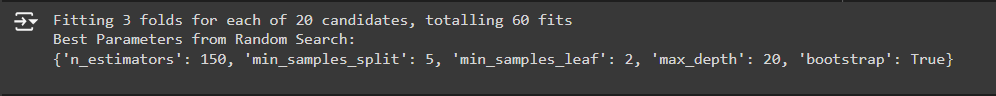

In [ ]:
import time
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from datetime import timedelta  # Import timedelta

with open('best_params.pkl', 'rb') as f:
    best_params = pickle.load(f)

# Train the model with best parameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42)

start_rf = time.time()

best_rf_model.fit(X_train, y_train)

# Predictions
y_pred = best_rf_model.predict(X_test)

end_rf = time.time()
times_rf = timedelta(seconds=round(end_rf - start_rf, 4)).total_seconds()
print("Times: ", times_rf)
rf_score = round(accuracy_score(y_test, y_pred)*100,2 )
accuracy_rf = rf_score
print("Accuracy: ", accuracy_rf)
print("Report: ", classification_report(y_test, y_pred))

Times:  2.5187
Accuracy:  90.62
Report:                precision    recall  f1-score   support

           0       0.69      0.28      0.40      6024
           1       0.92      0.98      0.95     48227

    accuracy                           0.91     54251
   macro avg       0.80      0.63      0.67     54251
weighted avg       0.89      0.91      0.89     54251



In [ ]:
f1score=f1_score(y_test, y_pred)
print("f1-score:",f1score)
pr=precision_score(y_test,y_pred)
print("Precision:",pr)
rs=recall_score(y_test,y_pred)
print("Recall_score:",rs)

f1-score: 0.9491342424121246
Precision: 0.9163915754522114
Recall_score: 0.9843033985112074


In [ ]:
# Updates model score to f1_dict
f1_dict["Random Forest"] = f1score
precision_dict["Random Forest"]  = pr
recall_dict["Random Forest"]  = rs

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Time: ", times_rf)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Time:  2.5187
Accuracy: 0.906213710346353
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.28      0.40      6024
           1       0.92      0.98      0.95     48227

    accuracy                           0.91     54251
   macro avg       0.80      0.63      0.67     54251
weighted avg       0.89      0.91      0.89     54251



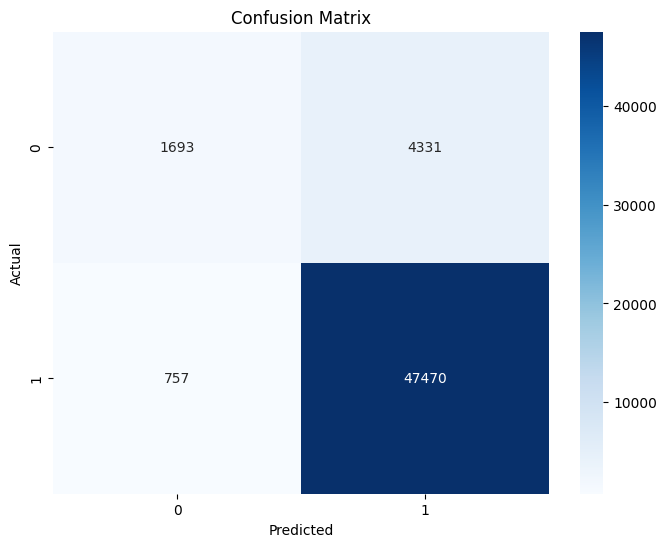

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Naive Bayes

In [ ]:
import pickle
import pandas as pd
import numpy as np
import time
import pickle
from datetime import timedelta  # Import timedelta
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [ ]:
# Initialize Naive Bayes Algorithms
from sklearn.naive_bayes import GaussianNB
nv = GaussianNB()
start_nv = time.time()
nv_pred = nv.fit (X_train, y_train).predict(X_test)
end_nv = time.time()
times_nv = timedelta(seconds=round(end_nv - start_nv,4)).total_seconds()
print("Time Naive Bayes: ", times_nv)
nv_score = round(accuracy_score(y_test, nv_pred)*100,2 )
accuracy_nv = nv_score
print("Accuracy: ", accuracy_nv)
print("Report: ", classification_report(y_test, nv_pred))

Time Naive Bayes:  0.0729
Accuracy:  86.97
Report:                precision    recall  f1-score   support

           0       0.20      0.06      0.09      6024
           1       0.89      0.97      0.93     48227

    accuracy                           0.87     54251
   macro avg       0.54      0.51      0.51     54251
weighted avg       0.81      0.87      0.84     54251



In [ ]:
f1score=f1_score(y_test, nv_pred)
print("f1-score:",f1score)
pr=precision_score(y_test,nv_pred)
print("Precision:",pr)
rs=recall_score(y_test,nv_pred)
print("Recall_score:",rs)

f1-score: 0.9298341389818059
Precision: 0.8918316831683168
Recall_score: 0.9712194413917515


In [ ]:
# Updates model score to f1_dict
f1_dict["Naive Bayes"] = f1score
precision_dict["Naive Bayes"]  = pr
recall_dict["Naive Bayes"]  = rs

In [ ]:
nv_pred

array([1, 1, 1, ..., 1, 0, 1])

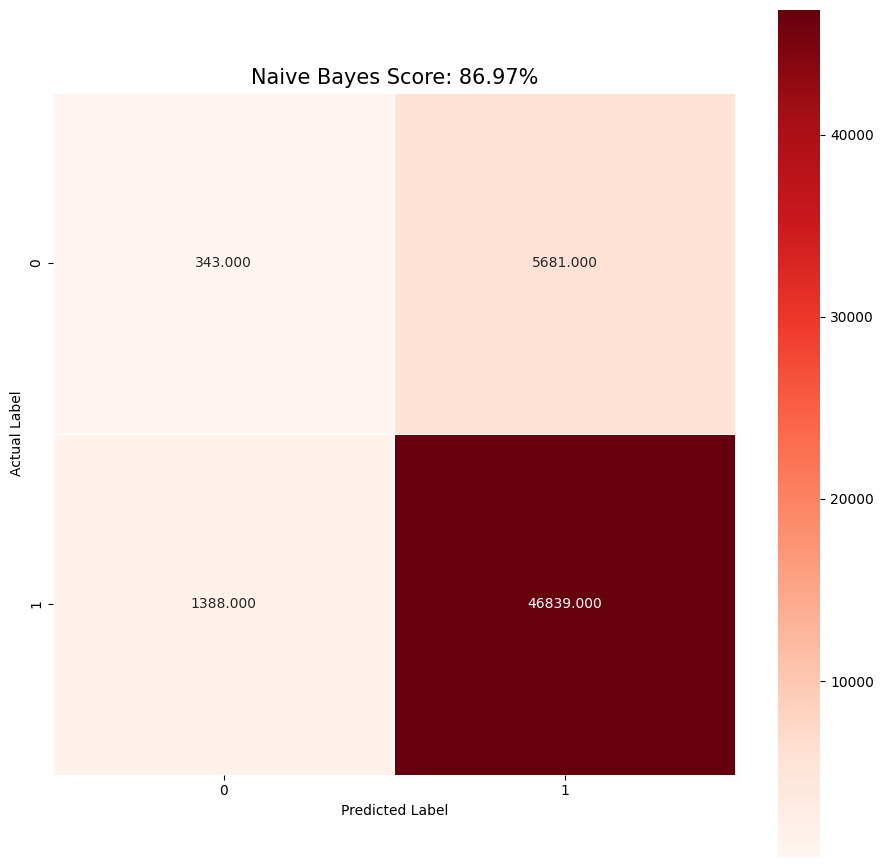

In [ ]:
#Vẽ ma trận nhầm lẫn cho thuật toán Naive Bayes
nv_cm = confusion_matrix(y_test, nv_pred)
plt.figure(figsize=(11,11))
ax=sns.heatmap(nv_cm, annot=True, fmt=".3f", linewidth=.5, square=True, cmap="Reds")
ax.set_ylabel("Actual Label")
ax.set_xlabel("Predicted Label")
title = 'Naive Bayes Score: {0}%'.format(nv_score)
plt.title(title, size=15)
plt.show()

# K_nearest

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
# Initialize KNN Algorithms
from sklearn.neighbors import KNeighborsClassifier
import time
from sklearn.metrics import classification_report
from datetime import timedelta
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
start_knn=time.time()
knn_scores=[]

for i in range(1,12):
    knc=KNeighborsClassifier(i)
    knn_pred=knc.fit(X_train,y_train).predict(X_test)
    knn_scores.append(metrics.accuracy_score(y_test,knn_pred))
    max_knn_score=max (knn_scores)

knn_scores_ind=[i for i, v in enumerate(knn_scores) if v == max_knn_score]
end_knn=time.time()
times_knn=timedelta(seconds=round(end_knn-start_knn,4)).total_seconds()
print("heighest Accuracy Score : {}% with k = {}".format(max_knn_score*100,list(map(lambda x:x+1,knn_scores_ind))))
print("Time", times_knn)
knn_score=round(max_knn_score*100,2)
accuracies_max_knn=knn_score
print("Accuracy",accuracies_max_knn,"%")
print("Report",metrics.classification_report(y_test,knn_pred))

heighest Accuracy Score : 90.58081878675047% with k = [11]
Time 66.8422
Accuracy 90.58 %
Report               precision    recall  f1-score   support

           0       0.70      0.27      0.39      6024
           1       0.92      0.99      0.95     48227

    accuracy                           0.91     54251
   macro avg       0.81      0.63      0.67     54251
weighted avg       0.89      0.91      0.89     54251



In [ ]:
f1score=f1_score(y_test, knn_pred)
print("f1-score:",f1score)
pr=precision_score(y_test,knn_pred)
print("Precision:",pr)
rs=recall_score(y_test,knn_pred)
print("Recall_score:",rs)

f1-score: 0.948985704017251
Precision: 0.9150574690514237
Recall_score: 0.9855267796047857


In [ ]:
# Updates model score to f1_dict
f1_dict["K-Nearest Neighbors"] = f1score
precision_dict["K-Nearest Neighbors"]  = pr
recall_dict["K-Nearest Neighbors"]  = rs

Text(0.5, 1.0, 'K-Nearest Neighbors Accuaracy Score : 90.58%')

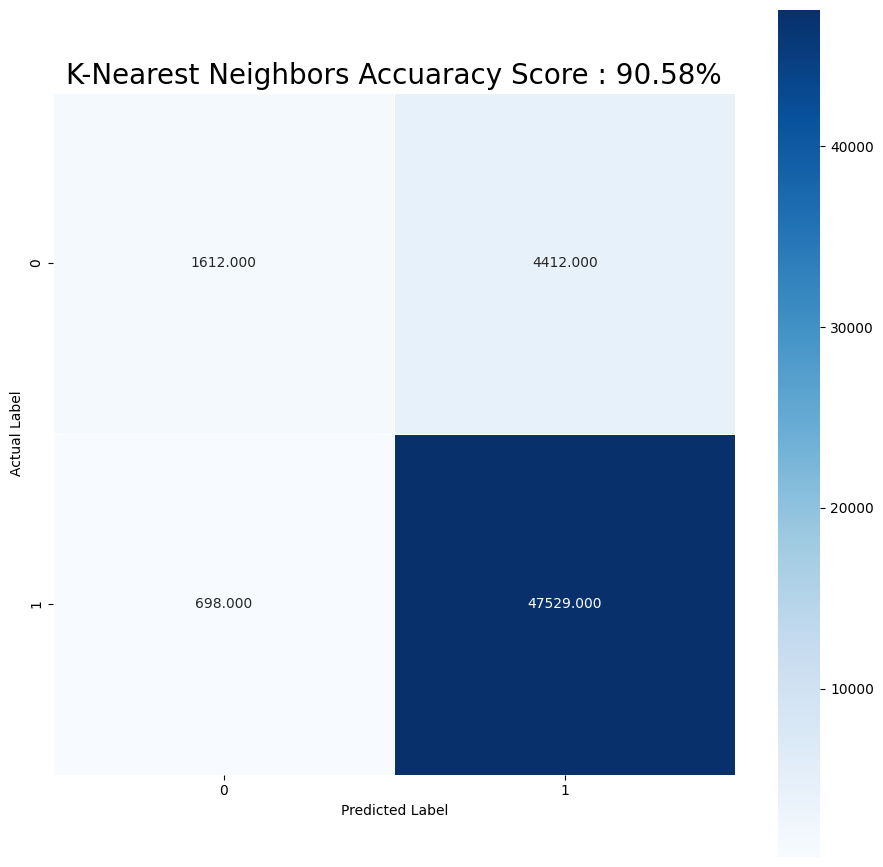

In [ ]:
knn_cm=metrics.confusion_matrix(y_test,knn_pred)
plt.figure(figsize=(11,11))
ax= sns.heatmap(knn_cm, annot=True, fmt=".3f",linewidths=.5,square=True,cmap='Blues')
ax.set_ylabel("Actual Label")
ax.set_xlabel("Predicted Label")
title="K-Nearest Neighbors Accuaracy Score : {0}%".format(knn_score)
plt.title(title,size=20)

# Decision Tree

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import time
from datetime import timedelta

In [ ]:

dt_model = tree.DecisionTreeClassifier(criterion="gini", random_state=0)
start_dt = time.time()
dt_pred = dt_model.fit(X_train,y_train).predict(X_test)
end_dt = time.time()
times_dt = timedelta(seconds=round(end_dt - start_dt, 4)).total_seconds()
print("Times: ", times_dt)
dt_score = round(accuracy_score(y_test, dt_pred)*100,2 )
accuracy_dt = dt_score
print("Accuracy: ", accuracy_dt)
print("Report: ")
print(classification_report(y_test, dt_pred, digits=5))

Times:  0.224
Accuracy:  90.15
Report: 
              precision    recall  f1-score   support

           0    0.61208   0.30777   0.40959      6024
           1    0.91859   0.97564   0.94625     48227

    accuracy                        0.90148     54251
   macro avg    0.76534   0.64170   0.67792     54251
weighted avg    0.88456   0.90148   0.88666     54251



In [ ]:
f1score=f1_score(y_test, dt_pred)
print("f1-score:",f1score)
pr=precision_score(y_test,dt_pred)
print("Precision:",pr)
rs=recall_score(y_test,dt_pred)
print("Recall_score:",rs)

f1-score: 0.9462538587617774
Precision: 0.9185896685018157
Recall_score: 0.9756360544922968


In [ ]:
# Updates model score to f1_dict
f1_dict["Decision Tree"] = f1score
precision_dict["Decision Tree"]  = pr
recall_dict["Decision Tree"]  = rs

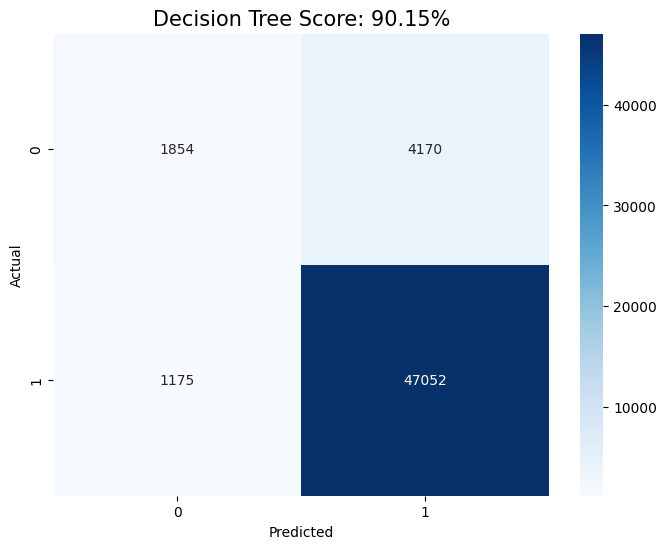

In [ ]:
conf_matrix = confusion_matrix(y_test, dt_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
title = 'Decision Tree Score: {0}%'.format(dt_score)
plt.title(title, size=15)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Comparison, Evaluation

<ipython-input-36-8ef1fb8e0f13>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=algorithms, y=times, palette='viridis')


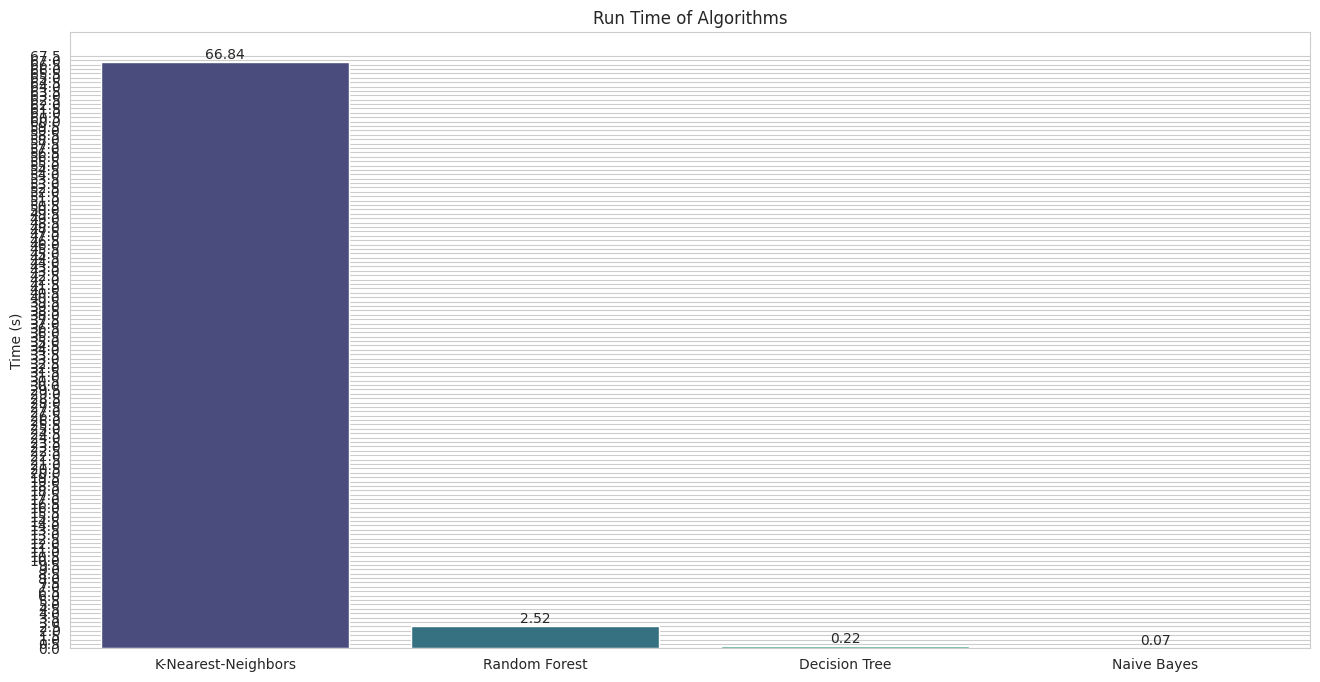

In [ ]:
#Draw a chart comparing the running time of algorithms

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a list of algorithms and their running times
algorithms = ['K-Nearest-Neighbors', 'Random Forest', 'Decision Tree', 'Naive Bayes']
times = [times_knn, times_rf, times_dt, times_nv]

sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
plt.yticks(np.arange(0, max(times) + 1, 0.5))
plt.ylabel('Time (s)')
plt.title('Run Time of Algorithms')
ax = sns.barplot(x=algorithms, y=times, palette='viridis')

# Annotate each bar with the running time
for i, time in enumerate(times):
    ax.annotate(f'{time:.2f}', xy=(i, time), ha='center', va='bottom')

plt.show()


<ipython-input-37-3a04b4adc065>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=algorithms, y=accuracies, palette=colors)


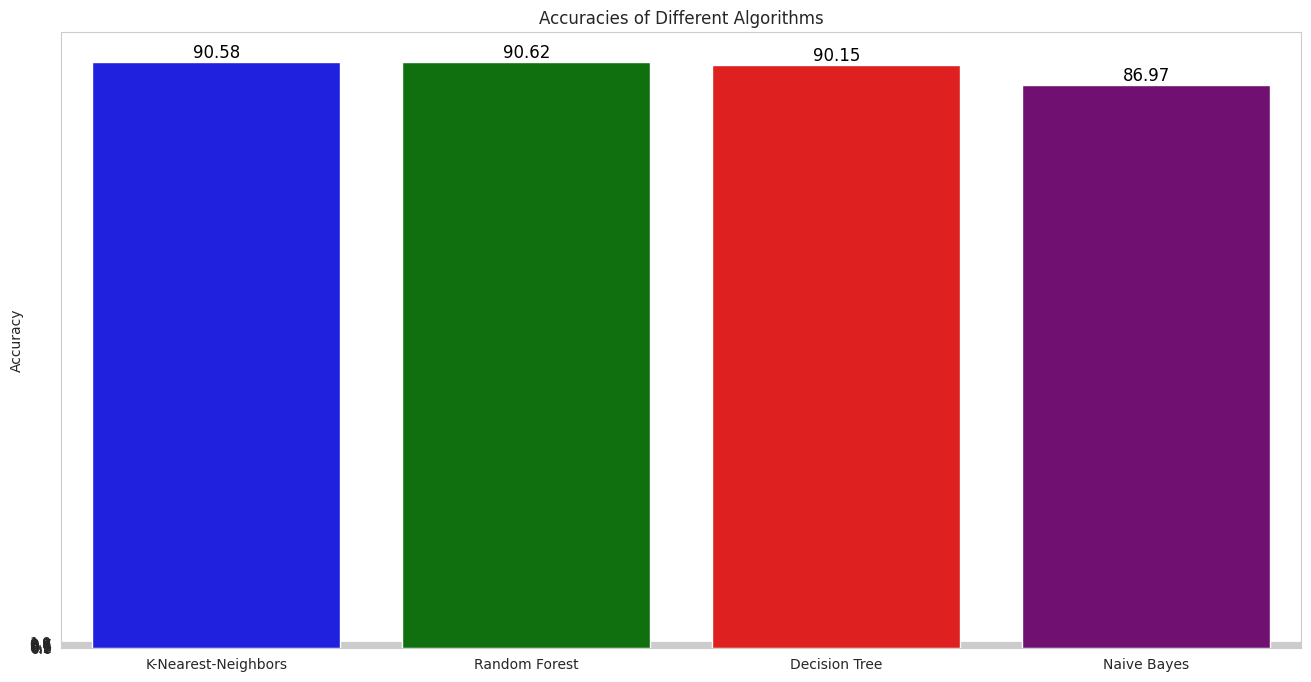

In [ ]:
#Draw a chart comparing the accuracy of algorithms:

# Create a list of algorithms and their accuracies
algorithms = ['K-Nearest-Neighbors', 'Random Forest', 'Decision Tree', 'Naive Bayes']
accuracies = [accuracies_max_knn, accuracy_rf, accuracy_dt, accuracy_nv]

colors = ['blue', 'green', 'red', 'purple']
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel('Accuracy')
plt.title('Accuracies of Different Algorithms')
ax = sns.barplot(x=algorithms, y=accuracies, palette=colors)

for i, accuracy in enumerate(accuracies):
    ax.annotate(f'{accuracy:.2f}', xy=(i, accuracy), ha='center', va='bottom', fontsize=12, color='black')

plt.show()

In [ ]:
results = pd.DataFrame({
  'Model': ['K-Nearest-Neighbors', 'Random Forest', 'Decision Tree (CART)', 'Naive Bayes'],
  'Score': [ accuracies_max_knn, accuracy_rf, accuracy_dt, accuracy_nv]})
result_df = results.sort_values (by='Score', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Score
Model,
Random Forest,90.62
K-Nearest-Neighbors,90.58
Decision Tree (CART),90.15
Naive Bayes,86.97


In [ ]:
keys = f1_dict, precision_dict, recall_dict
metrics = ['F1_Score', 'Precision', 'Recall']
data = pd.DataFrame(keys)
data.index = metrics
data

,Random Forest,Naive Bayes,K-Nearest Neighbors,Decision Tree
F1_Score,0.949134,0.929834,0.948986,0.946254
Precision,0.916392,0.891832,0.915057,0.918590
Recall,0.984303,0.971219,0.985527,0.975636


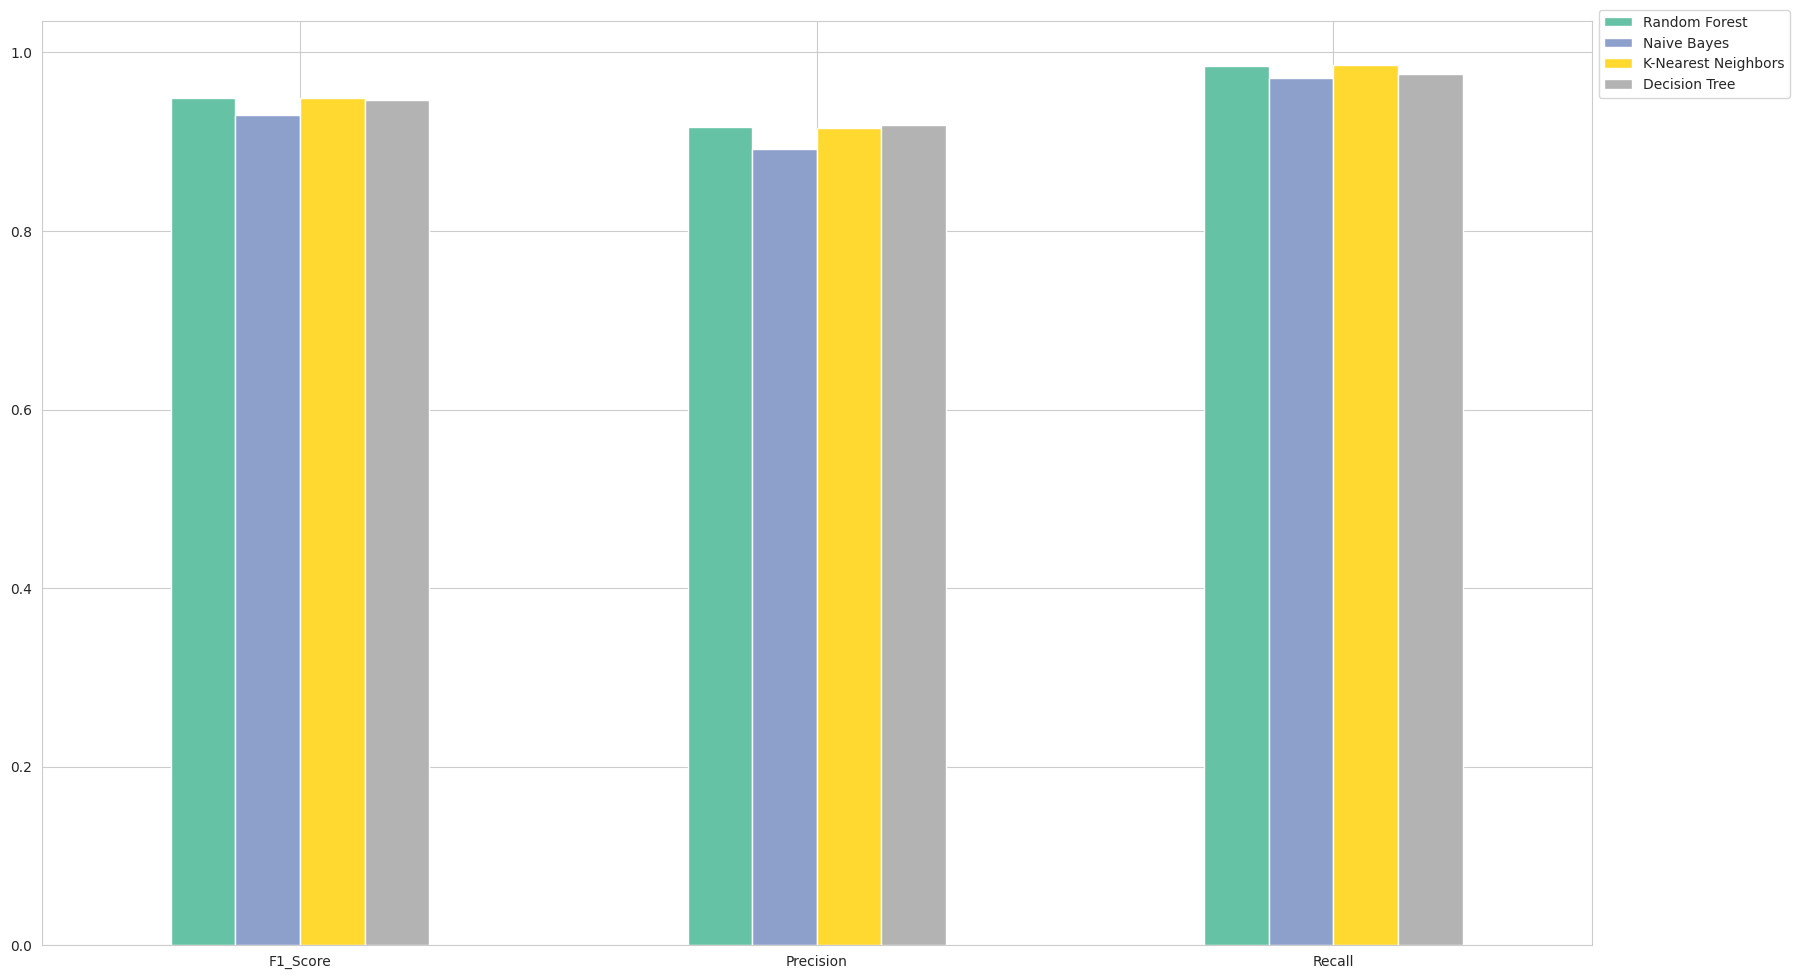

In [ ]:
result = data.plot(kind='bar', rot=0, figsize=(20, 12), cmap='Set2');

result.legend(bbox_to_anchor=(1, 1.02), loc='upper left');